# June 26, 2016 in Hindcast 202007F 

on 83rd time step goes NaN (physics) 84th (biology)

In [1]:
import xarray as xr

In [2]:
gT = xr.open_dataset('/home/sallen/202007/202007F/SalishSea_1h_20160626_20160630_grid_T_20160626-20160626.nc')

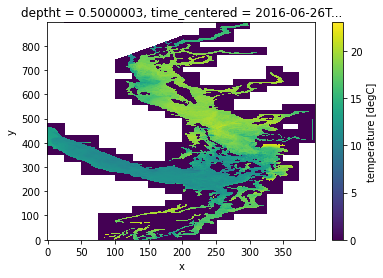

In [3]:
gT.votemper[0, 0].plot();

In [4]:
gU = xr.open_dataset('/home/sallen/202007/202007F/SalishSea_1h_20160626_20160630_grid_U_20160626-20160626.nc')

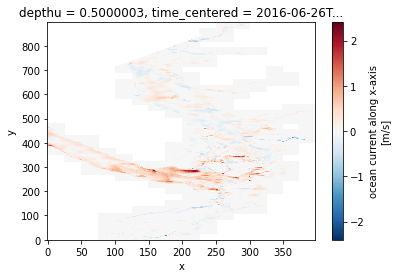

In [5]:
gU.vozocrtx[0, 0].plot();

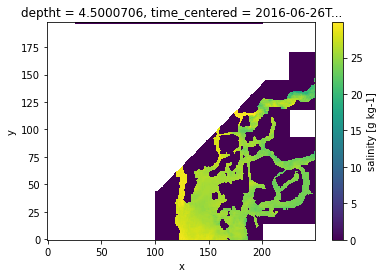

In [8]:
gT.vosaline[0, 4, 700:900, 0:250].plot();

So we have NaN about 100 grid points from the boundary.  That is 100 barotropic grid points or about 5 baroclinic time steps.  We'd expect that on time step 90 we would see 7*20: about 140 grid cells impacts.  

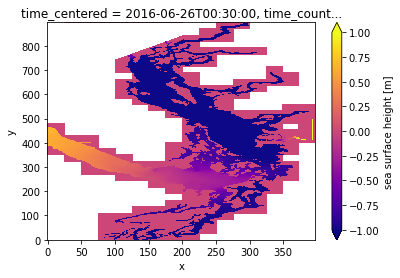

In [13]:
gT.sossheig[0].plot(vmax=1, vmin=-1, cmap='plasma');

### However,

We note that the lowR run went unstable on the first time step for 21Jul15 and that the maximum velocity at the first time step here is 15.2 m/s.  Things appear to have calmed down before the instability above, but a smooth restart might easily solve this problem.

Note that I originally thought the dates matched but they are 11 months out.  Also lowR is western boundary, this is northern boundary.  So not clear that this is a starting boundary problem.

## Rivers

In [16]:
rivers = xr.open_dataset('/home/sallen/MEOPAR/Tools/I_ForcingFiles/Rivers/ncfiles/R202102Dailies_y2016m06d26.nc')

In [17]:
rivers

<xarray.Dataset>
Dimensions:       (time_counter: 1, x: 398, y: 898)
Coordinates:
  * x             (x) int64 0 1 2 3 4 5 6 7 ... 390 391 392 393 394 395 396 397
  * y             (y) int64 0 1 2 3 4 5 6 7 ... 890 891 892 893 894 895 896 897
  * time_counter  (time_counter) int64 0
Data variables:
    rorunoff      (time_counter, y, x) float64 ...
Attributes:
    acknowledgements:      Based on river fit
    creator_email:         sallen@eoas.ubc.ca
    creator_name:          Salish Sea MEOPAR Project Contributors
    creator_url:           https://salishsea-meopar-docs.readthedocs.org/
    institution:           UBC EOAS
    institution_fullname:  Earth, Ocean & Atmospheric Sciences, University of...
    title:                 Rivers for y2016m06d26
    notebook:              MakeDailyRiverNCfiles.ipynb
    rivers_base:           river_202101
    summary:               Daily Runoff
    history:               [2021-02-02] File creation.

In [18]:
rivers.rorunoff.max()

<xarray.DataArray 'rorunoff' ()>
array(24.70158577)

In [19]:
rivers.rorunoff.min()

<xarray.DataArray 'rorunoff' ()>
array(0.)

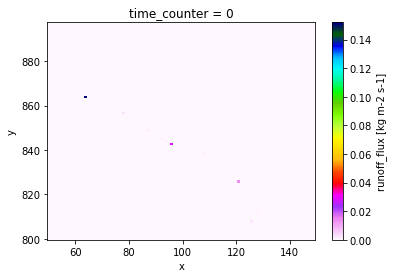

In [23]:
rivers.rorunoff[0, 800:, 50:150].plot(cmap='gist_ncar_r');

In [28]:
sshb = xr.open_dataset('/results/forcing/sshNeahBay/obs/ssh_y2016m06d25.nc')
ssh = xr.open_dataset('/results/forcing/sshNeahBay/obs/ssh_y2016m06d26.nc')

In [25]:
ssh

<xarray.Dataset>
Dimensions:       (time_counter: 24, xbT: 100, yb: 1)
Coordinates:
  * time_counter  (time_counter) datetime64[ns] 2016-06-26T01:00:00 ... 2016-...
  * xbT           (xbT) int64 0 1 2 3 4 5 6 7 8 9 ... 91 92 93 94 95 96 97 98 99
  * yb            (yb) int64 0
Data variables:
    nbidta        (yb, xbT) int64 ...
    nbjdta        (yb, xbT) int64 ...
    nbrdta        (yb, xbT) int64 ...
    sossheig      (time_counter, yb, xbT) float64 ...
    vobtcrtx      (time_counter, yb, xbT) float64 ...
    vobtcrty      (time_counter, yb, xbT) float64 ...
Attributes:
    Conventions:  CF-1.6
    title:        Juan de Fuca SSH hourly values
    institution:  Dept of Earth, Ocean & Atmospheric Sciences, University of ...
    source:       REQUIRED
    references:   REQUIRED
    history:      Mon Mar 12 08:05:16 2018: ncks -O --mk_rec_dmn time_counter...
    comment:      Neah Bay observed anomaly. Done in hindcast.
    NCO:          4.4.2

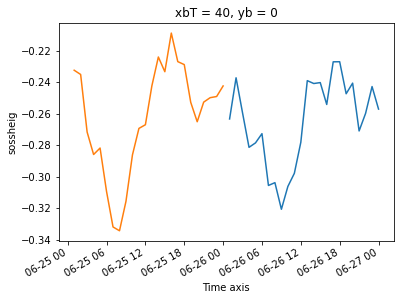

In [29]:
ssh.sossheig[:, 0, 40].plot()
sshb.sossheig[:, 0, 40].plot()

### Whatever, smooth the boundary conditions and see if that works (if not add the NaN code)

In [30]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [31]:
restart_file = xr.open_dataset('/data/sallen/results/MEOPAR/202007/202007F/SalishSea_04324320_restart.nc')
restart_file

<xarray.Dataset>
Dimensions:       (t: 1, x: 398, y: 898, z: 40)
Dimensions without coordinates: t, x, y, z
Data variables:
    nav_lon       (y, x) float32 ...
    nav_lat       (y, x) float32 ...
    nav_lev       (z) float32 ...
    time_counter  (t) float64 ...
    kt            float64 ...
    ndastp        float64 ...
    adatrj        float64 ...
    ssh_ibb       (t, y, x) float64 ...
    rnf_b         (t, y, x) float64 ...
    rnf_hc_b      (t, y, x) float64 ...
    rnf_sc_b      (t, y, x) float64 ...
    utau_b        (t, y, x) float64 ...
    vtau_b        (t, y, x) float64 ...
    qns_b         (t, y, x) float64 ...
    emp_b         (t, y, x) float64 ...
    sfx_b         (t, y, x) float64 ...
    en            (t, z, y, x) float64 ...
    avt           (t, z, y, x) float64 ...
    avm           (t, z, y, x) float64 ...
    avmu          (t, z, y, x) float64 ...
    avmv          (t, z, y, x) float64 ...
    mxln          (t, z, y, x) float64 ...
    ub2_b         (t, y, x) float64 ...
    vb2_b         (t, y, x) float64 ...
    sbc_hc_b      (t, y, x) float64 ...
    sbc_sc_b      (t, y, x) float64 ...
    qsr_hc_b      (t, z, y, x) float64 ...
    fraqsr_1lev   (t, y, x) float64 ...
    fse3t_b       (t, z, y, x) float64 ...
    fse3t_n       (t, z, y, x) float64 ...
    rdt           float64 ...
    rdttra1       float64 ...
    ub            (t, z, y, x) float64 ...
    vb            (t, z, y, x) float64 ...
    tb            (t, z, y, x) float64 ...
    sb            (t, z, y, x) float64 ...
    rotb          (t, z, y, x) float64 ...
    hdivb         (t, z, y, x) float64 ...
    sshb          (t, y, x) float64 ...
    un            (t, z, y, x) float64 ...
    vn            (t, z, y, x) float64 ...
    tn            (t, z, y, x) float64 ...
    sn            (t, z, y, x) float64 ...
    rotn          (t, z, y, x) float64 ...
    hdivn         (t, z, y, x) float64 ...
    sshn          (t, y, x) float64 ...
    rhop          (t, z, y, x) float64 ...
Attributes:
    file_name:  SalishSea_04324320_restart.nc
    TimeStamp:  21/03/2021 02:40:06 -0700

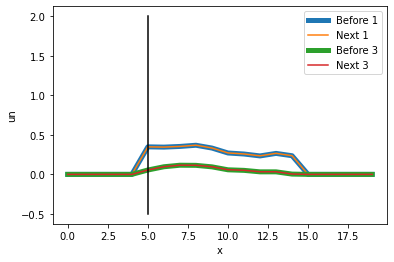

In [32]:
ib, ie = 40, 60
uveln19 = restart_file.un[0, 25-1]
uvelb19 = restart_file.ub[0, 25-1]
uvelb19[896, ib:ie].plot(label="Before 1", linewidth=5)
uveln19[896, ib:ie].plot(label="Next 1")
uvelb19[894, ib:ie].plot(label="Before 3", linewidth=5)
uveln19[894, ib:ie].plot(label="Next 3")
plt.plot([45-ib, 45-ib], [-0.5, 2], color='k');
plt.legend();

In [33]:
restart_file.un[0, :, 896, :] = restart_file.un[0, :, 895, :]
restart_file.ub[0, :, 896, :] = restart_file.ub[0, :, 895, :]
restart_file.vn[0, :, 895, :] = restart_file.vn[0, :, 894, :]
restart_file.vb[0, :, 895, :] = restart_file.vb[0, :, 894, :]

In [34]:
restart_file.attrs['Modified'] = 'copied velocity one away from north boundary to boundary'
restart_file.attrs

{'file_name': 'SalishSea_04324320_restart.nc',
 'TimeStamp': '21/03/2021 02:40:06 -0700',
 'Modified': 'copied velocity one away from north boundary to boundary'}

In [35]:
restart_file.to_netcdf('SalishSea_04324320_restart.nc')

Looks like its running okay now.